# 6.2 Exploring AllTrails Trail Data Relationships

## Table of Contents:

### 01. Import Visualization Libraries 
### 02. Import Cleaned Dataset
### 03. Correlations
### 04. Scatterplots
### 05. Pair Plots
### 06. Categorical Plots
### 07. Questions
### 08. Hypothesis


## 01. Import Visualization Libraries 

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

## 02. Import Cleaned Dataset 

In [3]:
# Create Path 

path=r'/Users/aylaarreguin/10-04-2022 AllTrails National Park Trail Analysis/'

In [4]:
# Import Data
df=pd.read_csv(os.path.join(path, 'Data', 'Prepared Data', 'AllTrails_cleaned.csv'), index_col=[0])

In [5]:
df.head()

,trail_id,name,area_name,city_name,state_name,country_name,popularity,difficulty_rating,route_type,avg_rating,num_reviews,features,activities,length_miles,elevation_gain_feet,latitude,longitude,difficulty,features_count,activities_count
0,10020048,Harding Ice Field Trail,Kenai Fjords National Park,Seward,Alaska,United States,24.8931,5,out and back,5.0,423,"['dogs-no', 'forest', 'river', 'views', 'water...","['birding', 'camping', 'hiking', 'nature-trips...",9.699973,3812.000122,60.18852,-149.63156,hard,7,5
1,10236086,Mount Healy Overlook Trail,Denali National Park,Denali National Park,Alaska,United States,18.0311,3,out and back,4.5,260,"['dogs-no', 'forest', 'views', 'wild-flowers',...","['birding', 'camping', 'hiking', 'nature-trips...",4.299988,1666.000053,63.73049,-148.91968,moderate,5,5
2,10267857,Exit Glacier Trail,Kenai Fjords National Park,Seward,Alaska,United States,17.7821,1,out and back,4.5,224,"['dogs-no', 'partially-paved', 'views', 'wildl...","['hiking', 'walking']",1.799995,269.000009,60.18879,-149.63100,easy,4,2
3,10236076,Horseshoe Lake Trail,Denali National Park,Denali National Park,Alaska,United States,16.2674,1,loop,4.5,237,"['dogs-no', 'forest', 'lake', 'kids', 'views',...","['birding', 'hiking', 'nature-trips', 'trail-r...",2.099994,393.000013,63.73661,-148.91500,easy,7,5
4,10236082,Triple Lakes Trail,Denali National Park,Denali National Park,Alaska,United States,12.5935,5,out and back,4.5,110,"['dogs-no', 'lake', 'views', 'wild-flowers', '...","['birding', 'fishing', 'hiking', 'nature-trips...",18.499948,3690.000118,63.73319,-148.89682,hard,5,5


## 03. Correlations 

In [6]:
# Create a correlation matrix using pandas
df.corr()

,trail_id,popularity,difficulty_rating,avg_rating,num_reviews,length_miles,elevation_gain_feet,latitude,longitude,features_count,activities_count
trail_id,1.000000,-0.338067,0.050839,-0.062823,-0.192443,0.066175,0.071352,-0.003866,0.062577,-0.223134,-0.137699
popularity,-0.338067,1.000000,-0.058711,0.290051,0.858392,-0.155096,-0.119100,0.042730,-0.042778,0.364200,0.121363
difficulty_rating,0.050839,-0.058711,1.000000,0.077282,-0.034286,0.357584,0.551672,0.036561,-0.076969,-0.037157,0.057668
avg_rating,-0.062823,0.290051,0.077282,1.000000,0.148374,-0.075578,-0.017960,0.068380,-0.015891,0.108704,0.031847
num_reviews,-0.192443,0.858392,-0.034286,0.148374,1.000000,-0.119141,-0.098565,0.008762,0.006569,0.261284,0.072350
length_miles,0.066175,-0.155096,0.357584,-0.075578,-0.119141,1.000000,0.805556,0.015901,-0.094043,0.071212,0.118167
elevation_gain_feet,0.071352,-0.119100,0.551672,-0.017960,-0.098565,0.805556,1.000000,0.035368,-0.117079,0.068305,0.121301
latitude,-0.003866,0.042730,0.036561,0.068380,0.008762,0.015901,0.035368,1.000000,-0.062823,0.227939,0.096730
longitude,0.062577,-0.042778,-0.076969,-0.015891,0.006569,-0.094043,-0.117079,-0.062823,1.000000,-0.015057,0.023944
features_count,-0.223134,0.364200,-0.037157,0.108704,0.261284,0.071212,0.068305,0.227939,-0.015057,1.000000,0.386844


In [7]:
df.columns

Index(['trail_id', 'name', 'area_name', 'city_name', 'state_name',
       'country_name', 'popularity', 'difficulty_rating', 'route_type',
       'avg_rating', 'num_reviews', 'features', 'activities', 'length_miles',
       'elevation_gain_feet', 'latitude', 'longitude', 'difficulty',
       'features_count', 'activities_count'],
      dtype='object')

In [8]:
# Create a subset excluding the 'trail_id', 'name', 'area_name', 'city_name', 'state_name', 'country_name', 'route_type','features', and 'activities' columns
sub = df[['popularity', 'difficulty_rating','avg_rating', 'num_reviews', 'length_miles',
       'elevation_gain_feet', 'latitude', 'longitude', 'difficulty','features_count', 'activities_count']]

In [9]:
sub

,popularity,difficulty_rating,avg_rating,num_reviews,length_miles,elevation_gain_feet,latitude,longitude,difficulty,features_count,activities_count
0,24.8931,5,5.0,423,9.699973,3812.000122,60.18852,-149.63156,hard,7,5
1,18.0311,3,4.5,260,4.299988,1666.000053,63.73049,-148.91968,moderate,5,5
2,17.7821,1,4.5,224,1.799995,269.000009,60.18879,-149.63100,easy,4,2
3,16.2674,1,4.5,237,2.099994,393.000013,63.73661,-148.91500,easy,7,5
4,12.5935,5,4.5,110,18.499948,3690.000118,63.73319,-148.89682,hard,5,5
...,...,...,...,...,...,...,...,...,...,...,...
3308,9.3861,5,4.5,43,12.499965,3628.000116,20.75275,-156.22884,hard,3,3
3309,9.1555,5,5.0,22,17.599951,3845.000123,20.71448,-156.25072,hard,3,3
3310,8.5066,1,4.5,31,0.199999,13.000000,20.71007,-156.25357,easy,3,2
3311,8.3240,5,4.0,8,11.999966,5482.000175,20.64981,-156.13700,hard,3,1


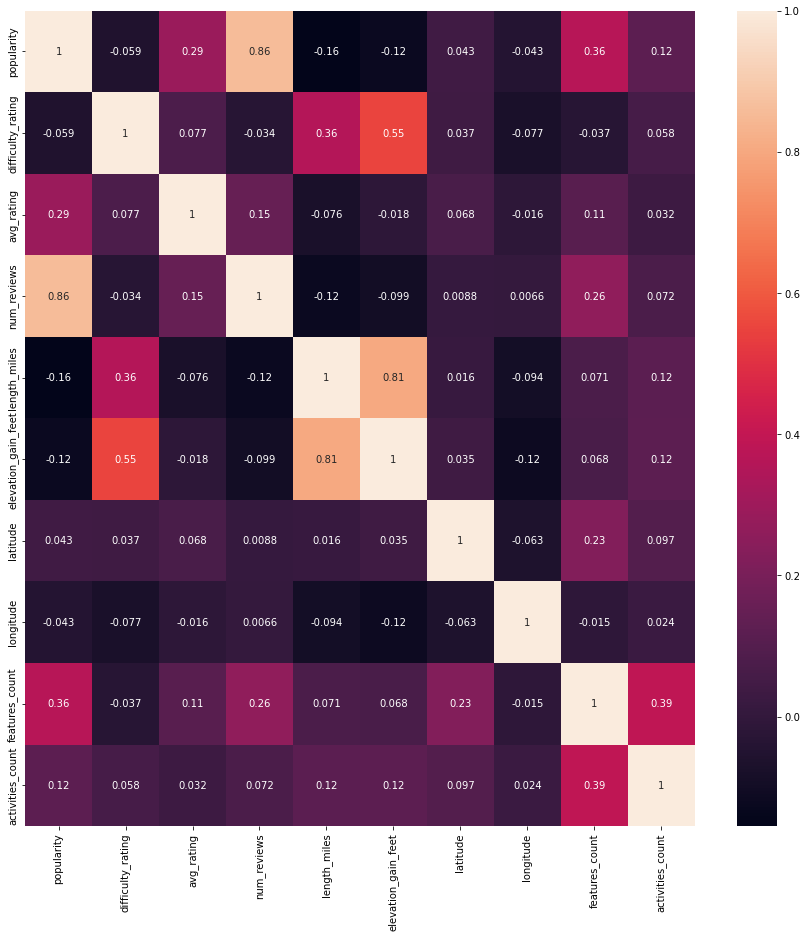

In [10]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(15,15))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(sub.corr(), annot = True, ax = ax)

# Save figure
plt.savefig("heatmap.png") 

### Strong Correlations
- Num_reviews and popularity of a trail (.86)
- Length_miles and elevation_gain_feet (.81)
- Elevation_gain_feet and difficulty_rating (.55)

### Moderate Correlations
- Feature_count of a trail and activities_count (.39)
- Popularity of a trail and the trails feature_count (.36) 
- Length_miles of a trail and it's difficuly_rating (.36)

### Weak Correlations
- Avg_rating and popularity of a trail (.29) 
- Num_reviews and features_count (.29)
- Latitude and features_count (.23)

## 04. Scatterplots

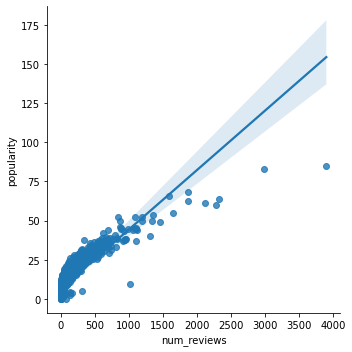

In [11]:
# Create a scatterplot for the "num_reviews" and "popularity" columns in seaborn

sns.lmplot(x = 'num_reviews', y = 'popularity', data = df)

- We can clearly see that as the number of reviews increase per trail, the popularity rating for that trail trends upward as well, demonstrating a strong positive correlation. The points remain clustered close to the trend line, demonstrating a good fit of line, up until around 2000 reviews at which point they begin to dip lower than the line. 

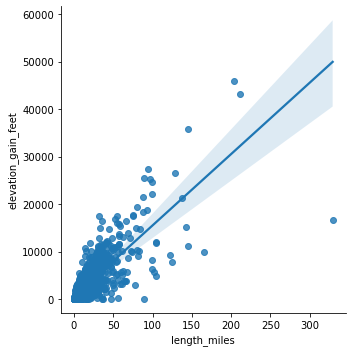

In [12]:
# Create a scatterplot for the "length_miles" and "elevation_gain_feet" columns in seaborn

sns.lmplot(x = 'length_miles', y = 'elevation_gain_feet', data = df)

- We can see a strong positive correlation as the length in miles increases the elevation gain in feet increases as well. The points are clustered closer to the line for miles 50 and below dropping further from the line of fit with increasing miles.  

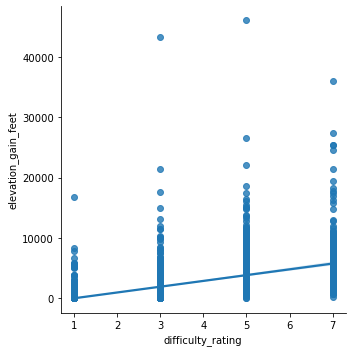

In [13]:
# Create a scatterplot for the "difficulty_rating" and "elevation_gain_feet" columns in seaborn

sns.lmplot(x = 'difficulty_rating', y = 'elevation_gain_feet', data = df)

- we can see how the difficulty rating categories are grouped by 1, 3, 5, and 7. As the elevation increases so too does the difficulty rating. There is a strong possitive correlation.

## 05. Pair Plots

In [14]:
# Print columns of interest 
sub.columns

Index(['popularity', 'difficulty_rating', 'avg_rating', 'num_reviews',
       'length_miles', 'elevation_gain_feet', 'latitude', 'longitude',
       'difficulty', 'features_count', 'activities_count'],
      dtype='object')

In [15]:
# Pair plots of columns of interest 
sub_2 = sub[['popularity', 'difficulty_rating', 'avg_rating', 'num_reviews',
       'length_miles', 'elevation_gain_feet', 'latitude', 'longitude',
       'difficulty', 'features_count', 'activities_count']]

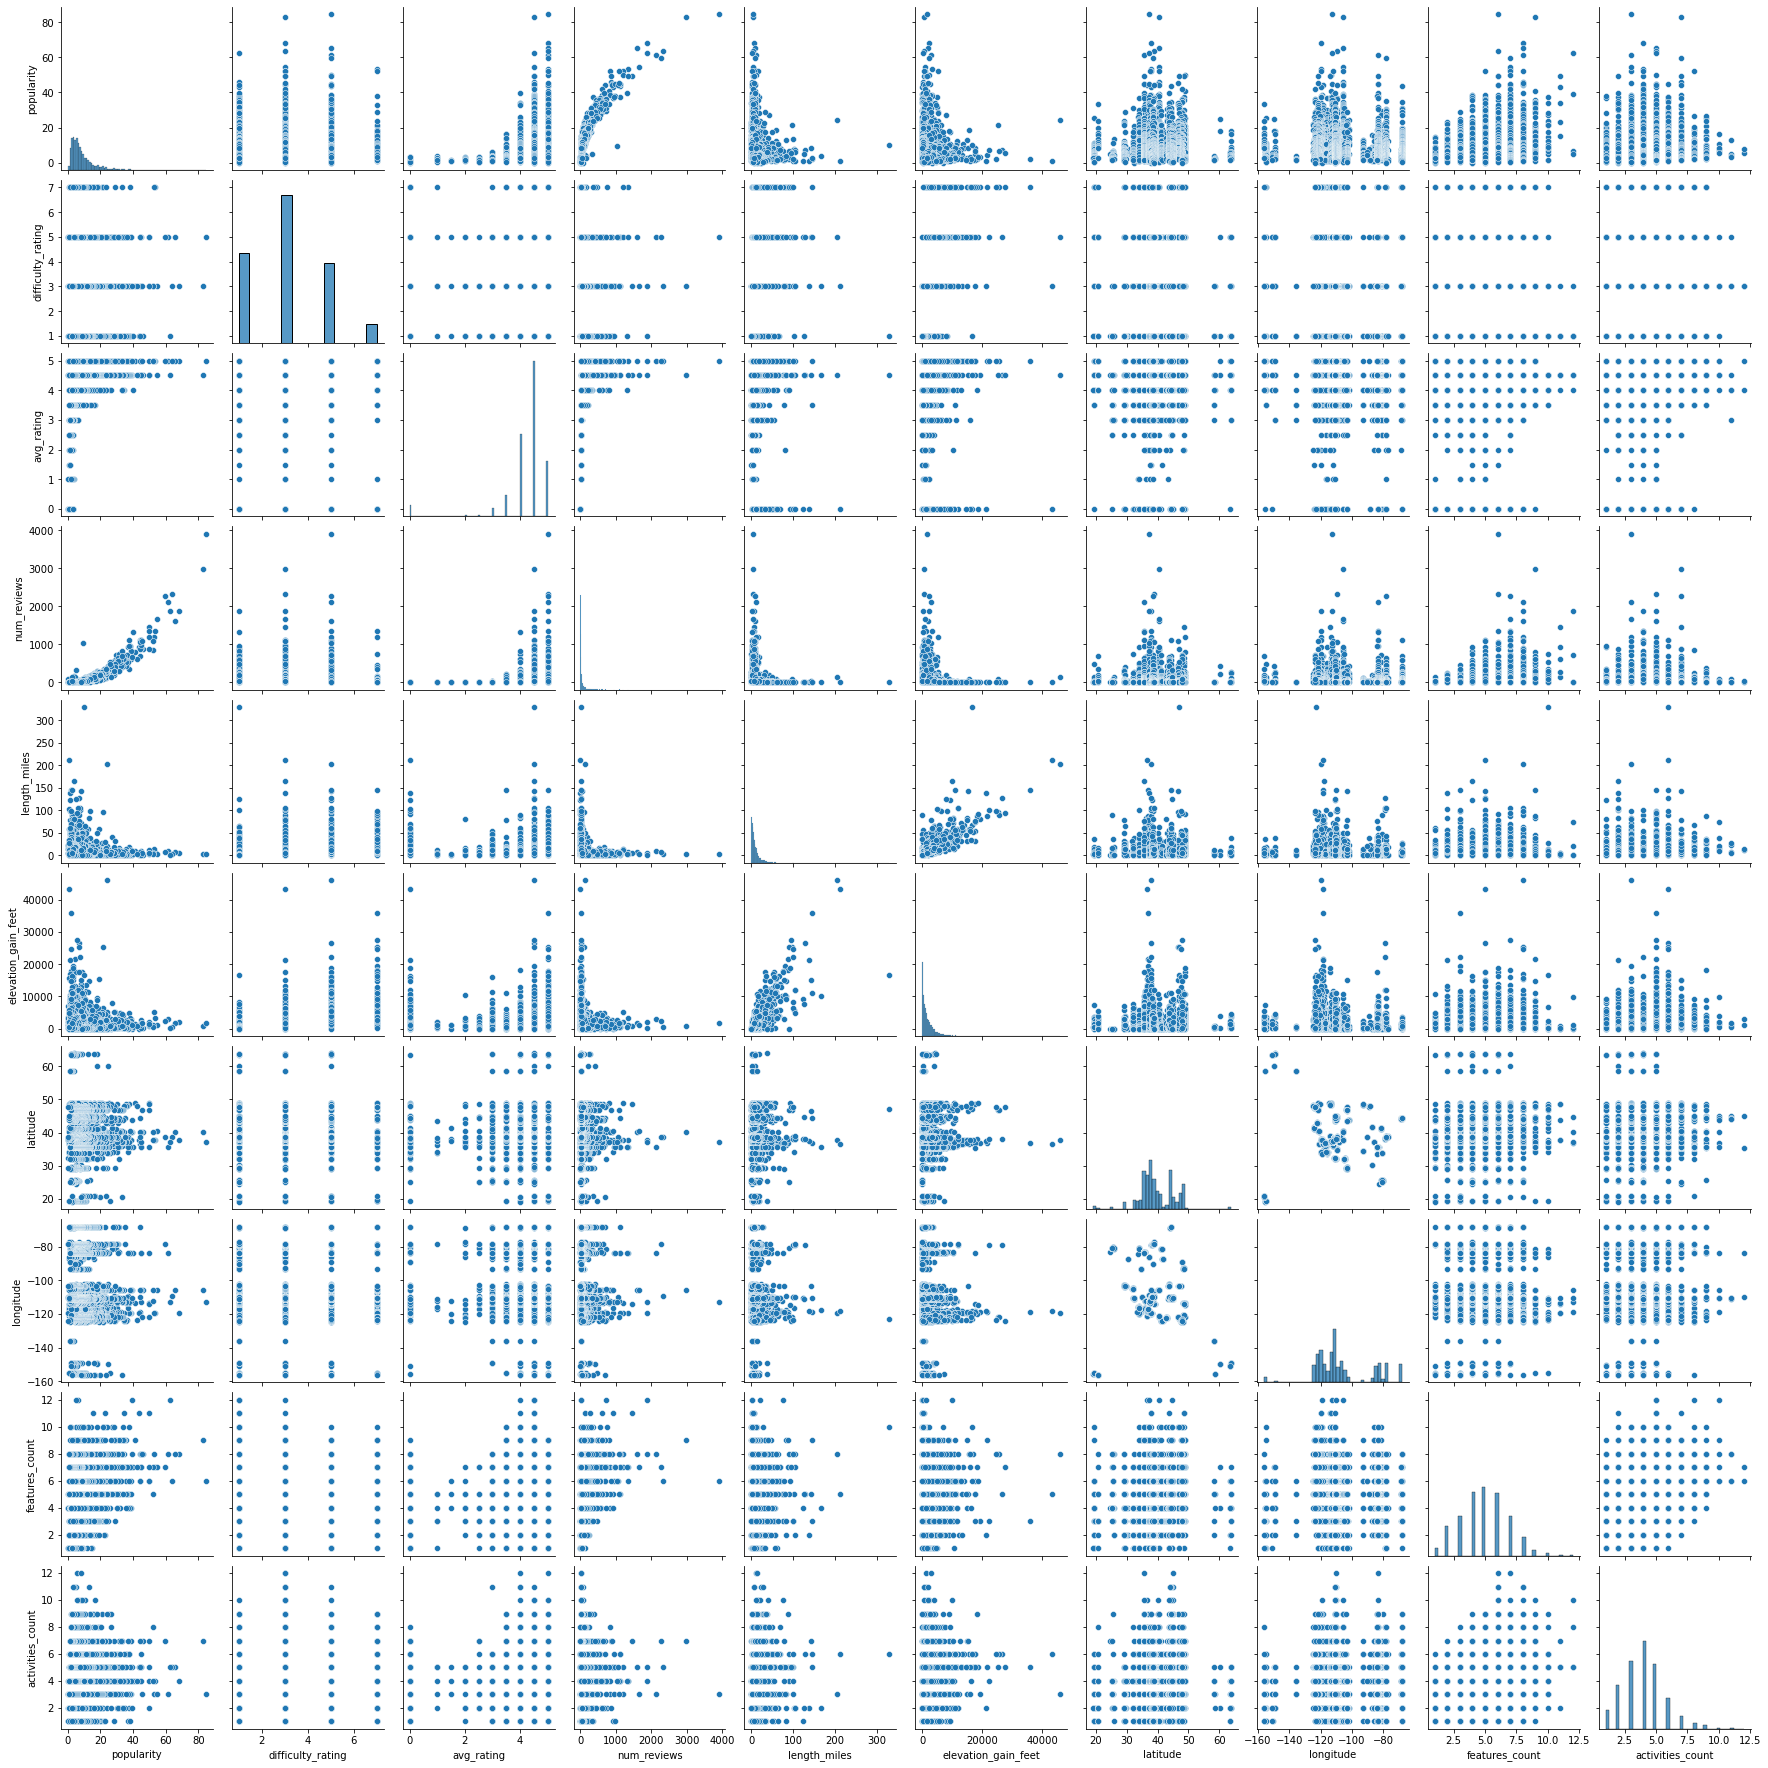

In [16]:
# Create a pair plot 

g = sns.pairplot(sub_2)

### Observations:
- As the average rating of a trail increases, the popularity increases.
- As the number of reviews of a treail increases, the popularity increases.
- As the length of miles of a trail increases, the popularity drops.
- As the elevation gain in feet of a trail increases, the popularity drops.
- The higher the average rating of a trail, the more popular. 
- The higher the average rating of a trail, the more reviews. 
- The more miles a trail is, the less reviews it has.
- The more elevation gain a trail has, the less reviews it has.
- The longer a trail, the more elevation gain.

## 06. Categorical Plot

<AxesSubplot:xlabel='features_count', ylabel='Count'>

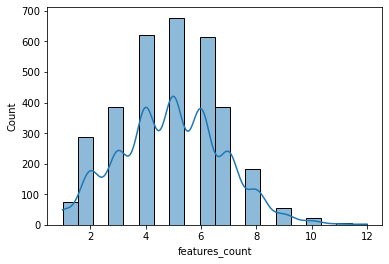

In [17]:
# Creating a categorical variable that splits the "features_count" column into categories
# Use a histogram to visualize the distribution of the variables. 
sns.histplot(df['features_count'], bins = 20, kde = True)

In [18]:
df.loc[df['features_count'] < 3, 'feature_category'] = 'few features'

In [19]:
df.loc[(df['features_count'] >= 3) & (df['features_count'] < 7), 'feature_category'] = 'moderate # features'

In [20]:
df.loc[df['features_count'] >= 7, 'feature_category'] = 'many features'

In [21]:
df['feature_category'].value_counts(dropna = False)

moderate # features    2296
many features           655
few features            362
Name: feature_category, dtype: int64

In [22]:
df.columns

Index(['trail_id', 'name', 'area_name', 'city_name', 'state_name',
       'country_name', 'popularity', 'difficulty_rating', 'route_type',
       'avg_rating', 'num_reviews', 'features', 'activities', 'length_miles',
       'elevation_gain_feet', 'latitude', 'longitude', 'difficulty',
       'features_count', 'activities_count', 'feature_category'],
      dtype='object')

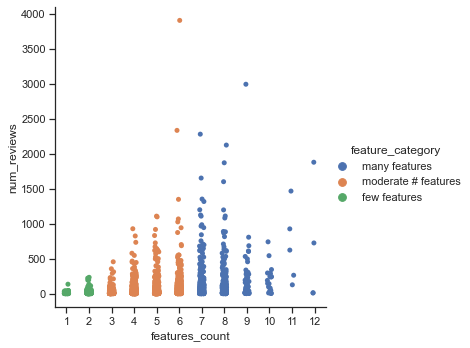

In [23]:
# Create a categorical plot in seaborn using the feature categories created above

sns.set(style="ticks")
g = sns.catplot(x="features_count", y="num_reviews", hue="feature_category", data=df)

The categorical plot shows that trails with few features had the least number of reviews. Hikes with a moderate number of features typally had 1300 or less reviews with a few outliers. Trails with many features were similarly reviewed but had a bit more highly reviewed trails. 

In [25]:
# Save the figure 
g.savefig("Categorical Feature Plot.png") 


## 07. Questions 

- Most questions previously asked were related to categorical variables which were not applicalbe to correlations.

### New Questions to Consider:
- What variables have the strongest correlation?
- Does the number of features a trail has affect the popularity of a trail?
- Does the difficulty of a trail affect the popularity of the trail?
- Does the length of a trail affect the difficulty of a trail?
- What are the attributes of trails that have the most reviews?

##  08. Hypothesis 
- The longer a trail is in miles, the less popular and less reviewed it will be. 
- The more elevation gain in feet a trail has, the less popular and less reviewed it will be. 
- Trails with a lower difficulty rating, will be the most popular and reviewed trails. 